In [2]:
# ============================== loading libraries ===========================================
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from prettytable import PrettyTable
import random
from scipy.stats import uniform
from sklearn.metrics import roc_curve, auc
from sklearn.learning_curve import validation_curve
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import precision_score, recall_score,roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
import joblib
from sklearn.svm import SVC
from sklearn import svm
from sklearn import linear_model
from scipy import stats
import scikitplot as skplt

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

#import nltk
#nltk.download('stopwords')

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#from gensim.models import KeyedVectors
#model = KeyedVectors.load_word2vec_format(‘GoogleNews-vectors-negative300.bin.gz’,binary=True)

#import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import TruncatedSVD

# =============================================================================================

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
fileObject = open("./train_to_file.pkl",'rb') # we open the file for reading 
X_train = pickle.load(fileObject) # load the object from the file

fileObject = open("./x_cv_to_file.pkl",'rb') # we open the file for reading 
X_cv = pickle.load(fileObject) # load the object from the file

fileObject = open("./x_test_to_file.pkl",'rb') # we open the file for reading 
X_test = pickle.load(fileObject) # load the object from the file

fileObject = open("./y_train_to_file.pkl",'rb') # we open the file for reading 
y_train = pickle.load(fileObject) # load the object from the file

fileObject = open("./y_cv_to_file.pkl",'rb') # we open the file for reading 
y_cv = pickle.load(fileObject) # load the object from the file

fileObject = open("./y_test_to_file.pkl",'rb') # we open the file for reading 
y_test = pickle.load(fileObject) # load the object from the file

In [4]:
#taking 40K data into consideration
X_train_1 = X_train[0:25000,9]
X_cv_1 = X_train[25000:32000,9]
X_test_1 = X_train[32000:38400,9]

X_test_2 = X_cv[0:1600,9]
X_test_1 = np.concatenate((X_test_1,X_test_2))

y_train_1 = y_train
y_train = y_train_1[0:25000]
y_cv_1 = y_train_1[25000:32000]
y_test_1 = y_train_1[32000:38400]

y_test_2 = y_cv[0:1600]
y_test = np.concatenate((y_test_1,y_test_2))

y_cv = []
y_cv = y_cv_1

In [5]:
print(y_train_1.shape)
print(y_cv.shape)
print(y_test.shape)

(38400,)
(7000,)
(8000,)


## BoW

In [51]:
#Appling BoW to fit and transform
count_vect =  CountVectorizer()
bow_NB = count_vect.fit(X_train_1)
train_bow_nstd = count_vect.transform(X_train_1)
cv_bow_nstd = count_vect.transform(X_cv_1) 
test_bow_nstd = count_vect.transform(X_test_1) 

print("the type of count vectorizer ",type(train_bow_nstd))
print("the number of unique words ", test_bow_nstd.get_shape()[1])

print(train_bow_nstd.shape)
print(cv_bow_nstd.shape)
print(test_bow_nstd.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  31275
(25000, 31275)
(7000, 31275)
(8000, 31275)
(25000,)
(7000,)
(8000,)


In [52]:
# Column Standardization of the BoW non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(train_bow_nstd)
train_bow = std_scal.transform(train_bow_nstd)
cv_bow = std_scal.transform(cv_bow_nstd)
test_bow = std_scal.transform(test_bow_nstd)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Applying Linear SVM on BOW

In [7]:
lin_svc_l1 = linear_model.SGDClassifier(penalty='l1')
lin_svc_l1.fit(train_bow, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [8]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]} #params we need to try on classifier
gsv_l1 = GridSearchCV(lin_svc_l1,param_grid,cv=5,verbose=1,scoring='f1')
gsv_l1.fit(train_bow,y_train)

print("Best HyperParameter: ",gsv_l1.best_params_)
print("Best Accuracy: %.2f%%"%(gsv_l1.best_score_*100))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   11.5s finished


Best HyperParameter:  {'alpha': 1}
Best Accuracy: 94.17%


In [9]:
    print("Scores for alphas:")
    print(gsv_l1.grid_scores_)
    print("\nBest estimator:")
    print(gsv_l1.best_estimator_)
    print("Best score:")
    print(gsv_l1.best_score_)
    print("\nBest parameters:")
    print(gsv_l1.best_params_)

Scores for alphas:
[mean: 0.93202, std: 0.00226, params: {'alpha': 0.001}, mean: 0.92222, std: 0.00593, params: {'alpha': 0.01}, mean: 0.93537, std: 0.00699, params: {'alpha': 0.1}, mean: 0.94169, std: 0.00000, params: {'alpha': 1}, mean: 0.94161, std: 0.00015, params: {'alpha': 10}, mean: 0.94169, std: 0.00000, params: {'alpha': 100}, mean: 0.75335, std: 0.37667, params: {'alpha': 1000}]

Best estimator:
SGDClassifier(alpha=1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
Best score:
0.9416869510001058

Best parameters:
{'alpha': 1}


C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [10]:
lin_svc_l2 = linear_model.SGDClassifier(penalty='l2')
lin_svc_l2.fit(train_bow, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [11]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]} #params we need to try on classifier
gsv_l2 = GridSearchCV(lin_svc_l2,param_grid,cv=5,verbose=1,scoring='f1')
gsv_l2.fit(train_bow,y_train)

print("Best HyperParameter: ",gsv_l2.best_params_)
print("\nBest Accuracy: %.2f%%"%(gsv_l2.best_score_*100))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best HyperParameter:  {'alpha': 0.1}

Best Accuracy: 95.44%


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    8.0s finished


In [12]:
    print("Scores for alphas:")
    print(gsv_l2.grid_scores_)
    print("\nBest estimator:")
    print(gsv_l2.best_estimator_)
    print("\nBest score:")
    print(gsv_l2.best_score_)
    print("\nBest parameters:")
    print(gsv_l2.best_params_)

Scores for alphas:
[mean: 0.94183, std: 0.00269, params: {'alpha': 0.001}, mean: 0.94462, std: 0.00241, params: {'alpha': 0.01}, mean: 0.95444, std: 0.00098, params: {'alpha': 0.1}, mean: 0.95240, std: 0.00085, params: {'alpha': 1}, mean: 0.94179, std: 0.00006, params: {'alpha': 10}, mean: 0.94169, std: 0.00000, params: {'alpha': 100}, mean: 0.94169, std: 0.00000, params: {'alpha': 1000}]

Best estimator:
SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

Best score:
0.9544443153473793

Best parameters:
{'alpha': 0.1}


C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [13]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=10):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    print("Class 0: Negatives ")
    for coef, feat in topn_class1:
        print (class_labels[0], coef, feat)

    print("\n")
    print("Class 1: Positives ")
    for coef, feat in reversed(topn_class2):
        print (class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(count_vect, lin_svc_l2)

Class 0: Negatives 
0 -41.38105302084237 not
0 -35.587842994820555 worst
0 -27.276858239214356 horrible
0 -25.098142902872365 anywher
0 -22.656923493427044 disappointed
0 -20.920473359120336 worse
0 -19.753914156468745 bland
0 -19.50681105816138 didn
0 -18.824736740429106 attract
0 -18.11374904485391 penetrate


Class 1: Positives 
1 52.408966854835796 great
1 37.35952786948995 best
1 34.40993447330705 love
1 31.368211944407403 wonderful
1 31.216678477104836 delicious
1 27.96648159282319 is
1 25.61070423385697 good
1 23.49425282692795 and
1 23.235311448755226 excellent
1 23.05294930562384 nice


In [14]:
# SVC with Linear kernel 
#with best alpha and penalty
lin_svc = linear_model.SGDClassifier(alpha=0.1,penalty='l2',loss='hinge')
lin_svc.fit(train_bow, y_train)

joblib.dump(lin_svc,"lin_svc.pkl")

['lin_svc.pkl']

In [15]:
lin_svc = joblib.load("lin_svc.pkl")

# Fit linear kernel model
best_model = lin_svc.fit(train_bow, y_train)
joblib.dump(best_model,"best_model.pkl")
best_model

SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [53]:
best_model = joblib.load("best_model.pkl")

# Predict target vector
predict_test = best_model.predict(test_bow)
#best_model.cv_results_ 

In [54]:
print("Score= ",best_model.score(test_bow, predict_test))
auc_score_lin_bow = roc_auc_score(y_test, predict_test)
print("AUC Score= ",auc_score_lin_bow)

Score=  1.0
AUC Score=  0.7107706741920982


In [18]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_bow = confusion_matrix(y_test, predict_test)
cm_bow

array([[ 414,  507],
       [ 198, 6881]], dtype=int64)

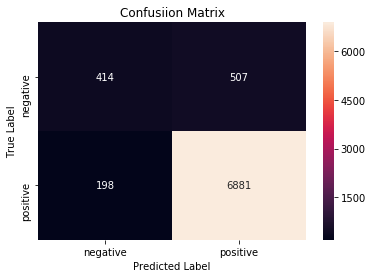

In [19]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_bow, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [20]:
model = CalibratedClassifierCV(lin_svc)
model.fit(train_bow, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
            cv=3, method='sigmoid')

In [21]:
# Predict target vector
predict_test_CalibCV = model.predict_proba(test_bow)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


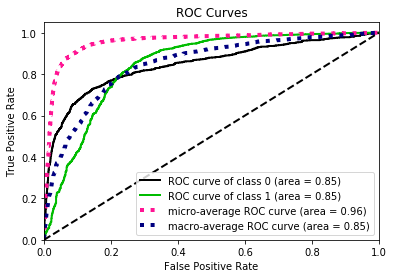

In [22]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,predict_test_CalibCV)

# Applying RBF SVM on BOW

In [ ]:
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(train_bow, y_train)

joblib.dump(rbf_svc,"rbf_svc.pkl")

In [7]:
rbf_svc = joblib.load("rbf_svc.pkl")

In [69]:
cs = [0.1, 1, 10]
for c in cs:
    rbf_svc = svm.SVC(kernel='rbf', C=c)
    rbf_svc.fit(train_bow, y_train)
    pred_cv = rbf_svc.predict(cv_bow)
        
    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
    print('\nCV accuracy for C  = %d and %d is %d%%' % (c,acc))

joblib.dump(rbf_svc,"rbf_svc.pkl")
joblib.dump(pred_cv,"pred_cv.pkl")


CV accuracy for C and gamma  = 0 and 0 is 89%

CV accuracy for C and gamma  = 1 and 0 is 89%

CV accuracy for C and gamma  = 10 and 0 is 91%


['pred_cv.pkl']

In [72]:
gammas = [0.1, 1, 10]
for gm in gammas:
    rbf_svc_gm = svm.SVC(kernel='rbf', gamma=gm)
    rbf_svc_gm.fit(train_bow, y_train)
    pred_cv_gm = rbf_svc.predict(cv_bow)
        
    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred_cv_gm, normalize=True) * float(100)
    print('\nCV accuracy for gamma  = %d  is %d%%' % (gm,acc))

joblib.dump(rbf_svc,"rbf_svc_gm.pkl")
joblib.dump(pred_cv,"pred_cv_gm.pkl")


CV accuracy for gamma  = 0  is 91%

CV accuracy for gamma  = 1  is 91%

CV accuracy for gamma  = 10  is 91%


['pred_cv_gm.pkl']

## Applying RBF SVM on BOW with Best parameters

In [7]:
# SVC with RBF kernel
rbf_svc_best = svm.SVC(kernel='rbf', C=10, gamma=0.1,class_weight='balanced')
rbf_svc_best.fit(train_bow, y_train)

joblib.dump(rbf_svc_best,"rbf_svc_best.pkl")

['rbf_svc_best.pkl']

In [68]:
rbf_svc_best = joblib.load("rbf_svc_best.pkl")

#rbf_svc_best_fit = rbf_svc_best.fit(train_bow, y_train)
#joblib.dump(rbf_svc_best_fit,"rbf_svc_best_fit.pkl")

In [69]:
#Predicting over Test data points
pred_test_rbf = rbf_svc_best.predict(test_bow)
print(pred_test_rbf)

[1 1 1 ... 1 1 1]


In [10]:
model_rbf_CalibCV = CalibratedClassifierCV(rbf_svc_best)
model_rbf_CalibCV.fit(train_bow, y_train)

joblib.dump(model_rbf_CalibCV,"model_rbf_CalibCV.pkl")

['model_rbf_CalibCV.pkl']

In [13]:
model_rbf_CalibCV = joblib.load("model_rbf_CalibCV.pkl")

# Predict target vector
predict_test_rbf_CalibCV = model_rbf_CalibCV.predict_proba(test_bow)

In [14]:
predict_test_rbf_CalibCV

array([[0.11039635, 0.88960365],
       [0.11039635, 0.88960365],
       [0.11039635, 0.88960365],
       ...,
       [0.11039635, 0.88960365],
       [0.11039635, 0.88960365],
       [0.11039635, 0.88960365]])

In [18]:
#defining own threshhold for prediction over probability values
def pred(y):
    y_pred = []
    i=[]
    for i in y:
        if i.any()>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

pred_test_rbf = pred(predict_test_rbf_CalibCV)

In [70]:
print("Score= ",rbf_svc_best.score(test_bow, pred_test_rbf))
auc_score_rbf_bow = roc_auc_score(y_test, pred_test_rbf)
print("AUC Score= ",auc_score_rbf_bow)

Score=  1.0
AUC Score=  0.5


In [20]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_bow_rbf = confusion_matrix(y_test, pred_test_rbf)
cm_bow_rbf

array([[   0,  921],
       [   0, 7079]], dtype=int64)

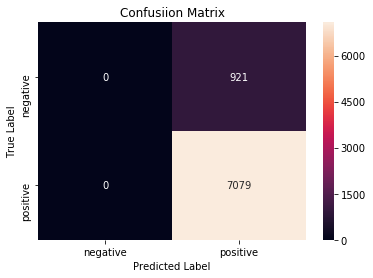

In [19]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_bow_rbf, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


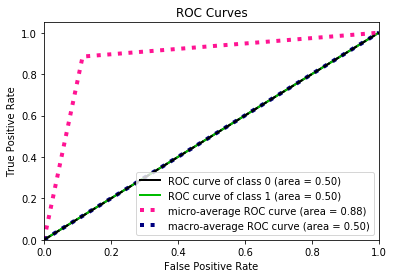

In [48]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,predict_test_rbf_CalibCV)

## tfidf

In [56]:
#tf-idf on train data
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1)) #considering only uni-gram as I was getting memory error
train_tf_idf_nstd = tf_idf_vect.fit_transform(X_train_1) #sparse matrix
cv_tfidf_nstd = tf_idf_vect.transform(X_cv_1)
test_tfidf_nstd = tf_idf_vect.transform(X_test_1)

print(train_tf_idf_nstd.shape)
print(cv_tfidf_nstd.shape)
print(test_tfidf_nstd.shape)

(25000, 31275)
(7000, 31275)
(8000, 31275)


In [57]:
# Column Standardization of the tfidf non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(train_tf_idf_nstd)
train_tfidf = std_scal.transform(train_tf_idf_nstd)
cv_tfidf = std_scal.transform(cv_tfidf_nstd)
test_tfidf = std_scal.transform(test_tfidf_nstd)

## Applying Linear SVM on tfidf

In [24]:
lin_svc_l1_tfidf = linear_model.SGDClassifier(penalty='l1')
lin_svc_l1_tfidf.fit(train_tfidf, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [25]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]} #params we need to try on classifier
gsv_l1_tfidf = GridSearchCV(lin_svc_l1_tfidf,param_grid,cv=5,verbose=1)
gsv_l1_tfidf .fit(train_tfidf ,y_train)

print("Best HyperParameter: ",gsv_l1_tfidf.best_params_)
print("Best Accuracy: %.2f%%"%(gsv_l1_tfidf.best_score_*100))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   13.3s finished


Best HyperParameter:  {'alpha': 10}
Best Accuracy: 88.98%


In [26]:
    print("Scores for alphas:")
    print(gsv_l1_tfidf.grid_scores_)
    print("\nBest estimator:")
    print(gsv_l1_tfidf.best_estimator_)
    print("Best score:")
    print(gsv_l1_tfidf.best_score_)
    print("\nBest parameters:")
    print(gsv_l1_tfidf.best_params_)

Scores for alphas:
[mean: 0.87940, std: 0.00595, params: {'alpha': 0.001}, mean: 0.86192, std: 0.00385, params: {'alpha': 0.01}, mean: 0.87584, std: 0.01051, params: {'alpha': 0.1}, mean: 0.88956, std: 0.00029, params: {'alpha': 1}, mean: 0.88980, std: 0.00000, params: {'alpha': 10}, mean: 0.88980, std: 0.00000, params: {'alpha': 100}, mean: 0.73388, std: 0.31184, params: {'alpha': 1000}]

Best estimator:
SGDClassifier(alpha=10, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
Best score:
0.8898

Best parameters:
{'alpha': 10}


C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [27]:
lin_svc_l2_tfidf = linear_model.SGDClassifier(penalty='l2')
lin_svc_l2_tfidf.fit(train_tfidf, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [28]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]} #params we need to try on classifier
gsv_l2_tfidf = GridSearchCV(lin_svc_l2_tfidf,param_grid,cv=5,verbose=1)
gsv_l2_tfidf.fit(train_tfidf,y_train)

print("Best HyperParameter: ",gsv_l2_tfidf.best_params_)
print("\nBest Accuracy: %.2f%%"%(gsv_l2_tfidf.best_score_*100))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best HyperParameter:  {'alpha': 0.1}

Best Accuracy: 91.16%


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    8.3s finished


In [29]:
    print("Scores for alphas:")
    print(gsv_l2_tfidf.grid_scores_)
    print("\nBest estimator:")
    print(gsv_l2_tfidf.best_estimator_)
    print("\nBest score:")
    print(gsv_l2_tfidf.best_score_)
    print("\nBest parameters:")
    print(gsv_l2_tfidf.best_params_)

Scores for alphas:
[mean: 0.89268, std: 0.00360, params: {'alpha': 0.001}, mean: 0.89656, std: 0.00561, params: {'alpha': 0.01}, mean: 0.91156, std: 0.00330, params: {'alpha': 0.1}, mean: 0.90964, std: 0.00283, params: {'alpha': 1}, mean: 0.88992, std: 0.00016, params: {'alpha': 10}, mean: 0.88980, std: 0.00000, params: {'alpha': 100}, mean: 0.88980, std: 0.00000, params: {'alpha': 1000}]

Best estimator:
SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

Best score:
0.91156

Best parameters:
{'alpha': 0.1}


C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [30]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=10):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    print("Class 0: Negatives ")
    for coef, feat in topn_class1:
        print (class_labels[0], coef, feat)

    print("\n")
    print("Class 1: Positives ")
    for coef, feat in reversed(topn_class2):
        print (class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tf_idf_vect, lin_svc_l2_tfidf)

Class 0: Negatives 
0 -36.854171633900584 not
0 -35.166153026112156 worst
0 -29.163552080145802 horrible
0 -26.013145643487032 bland
0 -25.098142902872347 anywher
0 -22.546207851953916 unfortunately
0 -22.292106114998916 didn
0 -21.93773883367214 disappointing
0 -21.667189877636133 disappointed
0 -20.546018184030455 fallen


Class 1: Positives 
1 55.96415109432696 great
1 38.80500710523418 best
1 34.63612821600555 love
1 30.78733469404229 good
1 29.903761119494252 and
1 27.00232177197329 is
1 26.69987447468125 wonderful
1 25.043439816651283 nice
1 24.371192535019432 are
1 24.154586674719003 excellent


In [31]:
# SVC with Linear kernel 
#with best alpha and penalty
lin_svc_tfidf = linear_model.SGDClassifier(alpha=1,penalty='l2',loss='hinge')
lin_svc_tfidf.fit(train_tfidf, y_train)

joblib.dump(lin_svc_tfidf,"lin_svc_tfidf.pkl")

['lin_svc_tfidf.pkl']

In [32]:
lin_svc_tfidf = joblib.load("lin_svc_tfidf.pkl")

# Fit linear kernel model
best_model_tfidf = lin_svc_tfidf.fit(train_tfidf, y_train)

joblib.dump(best_model_tfidf,"best_model_tfidf.pkl")
best_model_tfidf

SGDClassifier(alpha=1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [59]:
best_model_tfidf = joblib.load("best_model_tfidf.pkl")

# Predict target vector
predict_test_tfidf = best_model_tfidf.predict(test_tfidf)
#best_model.cv_results_ 

In [84]:
print("Score= ",best_model_tfidf.score(test_tfidf, predict_test_tfidf))
auc_score_lin_tfidf = roc_auc_score(y_test, predict_test_tfidf)
print("AUC Score= ",auc_score_lin_tfidf)

Score=  1.0
AUC Score=  0.6141421791817765


In [36]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_bow_tfidf = confusion_matrix(y_test, predict_test_tfidf)
cm_bow_tfidf

array([[ 223,  698],
       [  98, 6981]], dtype=int64)

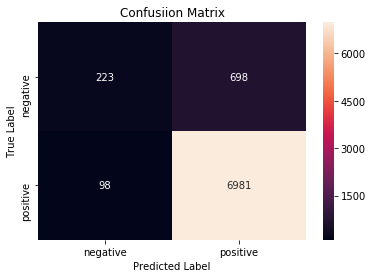

In [37]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_bow_tfidf, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [38]:
model_tfidf = CalibratedClassifierCV(lin_svc_tfidf)
model_tfidf.fit(train_tfidf, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
            cv=3, method='sigmoid')

In [39]:
# Predict target vector
predict_test_CalibCV_tfidf = model_tfidf.predict_proba(test_tfidf)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


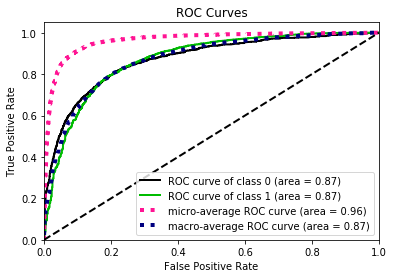

In [40]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,predict_test_CalibCV_tfidf)

## Applying RBF SVM on tfidf

In [41]:
# SVC with RBF kernel
rbf_svc_tfidf = svm.SVC(kernel='rbf')
rbf_svc_tfidf.fit(train_tfidf, y_train)

joblib.dump(rbf_svc_tfidf,"rbf_svc_tfidf.pkl")

['rbf_svc_tfidf.pkl']

In [42]:
rbf_svc_tfidf = joblib.load("rbf_svc_tfidf.pkl")

## tuning C for rbf kernel

In [44]:
cs = [0.1, 1, 10]
for c in cs:
    rbf_svc_tfidf = svm.SVC(kernel='rbf', C=c)
    rbf_svc_tfidf.fit(train_tfidf, y_train)
    pred_cv_tfidf = rbf_svc_tfidf.predict(cv_tfidf)
        
    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred_cv_tfidf, normalize=True) * float(100)
    print('\nCV accuracy for C  = %d is %d%%' % (c,acc))

joblib.dump(rbf_svc_tfidf,"rbf_svc_tfidf.pkl")
joblib.dump(pred_cv_tfidf,"pred_cv_tfidf.pkl")


CV accuracy for C  = 0 is 89%

CV accuracy for C  = 1 is 89%

CV accuracy for C  = 10 is 91%


['pred_cv_tfidf.pkl']

## tuning gamma for rbf kernel

In [46]:
gammas = [0.1, 1, 10]
for gm in gammas:
    rbf_svc_gm = svm.SVC(kernel='rbf', gamma=gm)
    rbf_svc_gm.fit(train_tfidf, y_train)
    pred_cv_gm_tfidf = rbf_svc_gm.predict(cv_tfidf)
        
    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred_cv_gm_tfidf, normalize=True) * float(100)
    print('\nCV accuracy for gamma  = %d  is %d%%' % (gm,acc))

joblib.dump(rbf_svc_gm,"rbf_svc_gm.pkl")
joblib.dump(pred_cv_gm_tfidf,"pred_cv_gm_tfidf.pkl")


CV accuracy for gamma  = 0  is 89%

CV accuracy for gamma  = 1  is 89%

CV accuracy for gamma  = 10  is 89%


NameError: name 'rbf_svc_gm_tfidf' is not defined

## SVC with RBF kernel with best parameters

In [80]:
# SVC with RBF kernel
rbf_svc_best_tfidf = svm.SVC(kernel='rbf', C=10, gamma=1,class_weight='balanced')
rbf_svc_best_tfidf.fit(train_tfidf, y_train)

joblib.dump(rbf_svc_best_tfidf,"rbf_svc_best_tfidf.pkl")

['rbf_svc_best_tfidf.pkl']

In [81]:
rbf_svc_best_tfidf = joblib.load("rbf_svc_best_tfidf.pkl")

#rbf_svc_best_fit = rbf_svc_best.fit(train_bow, y_train)
#joblib.dump(rbf_svc_best_fit,"rbf_svc_best_fit.pkl")

In [82]:
#Predicting over Test data points
pred_test_rbf_tfidf = rbf_svc_best_tfidf.predict(test_tfidf)
print(pred_test_rbf_tfidf)

[1 1 1 ... 1 1 1]


In [50]:
model_rbf_CalibCV_tfidf = CalibratedClassifierCV(rbf_svc_best_tfidf)
model_rbf_CalibCV_tfidf.fit(train_tfidf, y_train)

joblib.dump(model_rbf_CalibCV_tfidf,"model_rbf_CalibCV_tfidf.pkl")

['model_rbf_CalibCV_tfidf.pkl']

In [51]:
model_rbf_CalibCV_tfidf = joblib.load("model_rbf_CalibCV_tfidf.pkl")

# Predict target vector
predict_test_rbf_CalibCV_tfidf = model_rbf_CalibCV_tfidf.predict_proba(test_tfidf)

In [52]:
predict_test_rbf_CalibCV_tfidf

array([[0.11034875, 0.88965125],
       [0.11034875, 0.88965125],
       [0.11034875, 0.88965125],
       ...,
       [0.11034875, 0.88965125],
       [0.11034875, 0.88965125],
       [0.11034875, 0.88965125]])

In [ ]:
#defining own threshhold for prediction over probability values
def pred(y):
    y_pred = []
    i=[]
    for i in y:
        if i.any()>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

pred_test_rbf_tfidf = pred(predict_test_rbf_CalibCV_tfidf)

In [85]:
print("Score= ",rbf_svc_best_tfidf.score(test_bow, pred_test_rbf_tfidf))
auc_score_rbf_tfidf = roc_auc_score(y_test, pred_test_rbf_tfidf)
print("AUC Score= ",auc_score_rbf_tfidf)

Score=  1.0
AUC Score=  0.5


In [54]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_tfidf_rbf = confusion_matrix(y_test, pred_test_rbf_tfidf)
cm_tfidf_rbf

array([[   0,  921],
       [   0, 7079]], dtype=int64)

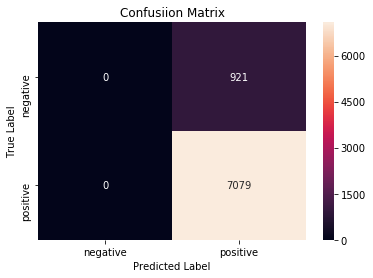

In [55]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_tfidf_rbf, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


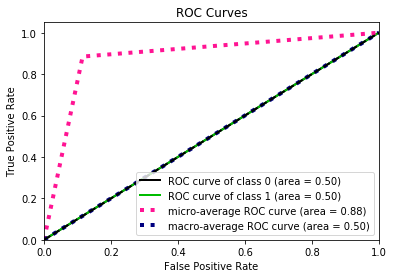

In [56]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,predict_test_rbf_CalibCV_tfidf)

## avgW2V

In [28]:
fileObject = open("./final_to_file2.pkl",'rb') # we open the file for reading 
final = pickle.load(fileObject) # load the object from the file

In [29]:
#w2v
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())
    
print(type(list_of_sent))
print(final['CleanedText'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

<class 'list'>
witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [30]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [31]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
#print(len(sent_vectors[0]))
print(type(sent_vectors))

60000
<class 'list'>


In [32]:
# create design matrix X and target vector y
X = np.array(sent_vectors[::]) # end index is exclusive
y = np.array(final['Score']) # showing you two ways of indexing a pandas df

In [33]:
#taking 40K data into consideration
X_train_nstd = X[0:25000:1]
X_cv_nstd = X[25000:32000:1]
X_test_nstd = X[32000:40000:1]

y_train_nstd = y[0:25000:1]
y_cv_nstd = y[25000:32000:1]
y_test_nstd = y[32000:40000:1]

print(X_train_nstd.shape)
print(X_cv_nstd.shape)
print(X_test_nstd.shape)
print(y_train_nstd.shape)
print(y_cv_nstd.shape)
print(y_test_nstd.shape)

(25000, 50)
(7000, 50)
(8000, 50)
(25000,)
(7000,)
(8000,)


In [34]:
# Column Standardization of the tfidf non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(X_train_nstd)
train_avgw2v = std_scal.transform(X_train_nstd)
cv_avgw2v = std_scal.transform(X_cv_nstd)
test_avgw2v = std_scal.transform(X_test_nstd)

## Applying Linear SVM on AvgW2V

In [64]:
lin_svc_l1_avgw2v = linear_model.SGDClassifier(penalty='l1')
lin_svc_l1_avgw2v.fit(train_avgw2v, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [65]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]} #params we need to try on classifier
gsv_l1_avgw2v = GridSearchCV(lin_svc_l1_avgw2v,param_grid,cv=5,verbose=1)
gsv_l1_avgw2v.fit(train_avgw2v,y_train)

print("Best HyperParameter: ",gsv_l1_avgw2v.best_params_)
print("Best Accuracy: %.2f%%"%(gsv_l1_avgw2v.best_score_*100))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    7.1s finished


Best HyperParameter:  {'alpha': 0.001}
Best Accuracy: 90.37%


In [66]:
    print("Scores for alphas:")
    print(gsv_l1_avgw2v.grid_scores_)
    print("\nBest estimator:")
    print(gsv_l1_avgw2v.best_estimator_)
    print("Best score:")
    print(gsv_l1_avgw2v.best_score_)
    print("\nBest parameters:")
    print(gsv_l1_avgw2v.best_params_)

Scores for alphas:
[mean: 0.90368, std: 0.00746, params: {'alpha': 0.001}, mean: 0.88980, std: 0.00000, params: {'alpha': 0.01}, mean: 0.88980, std: 0.00000, params: {'alpha': 0.1}, mean: 0.88980, std: 0.00000, params: {'alpha': 1}, mean: 0.88980, std: 0.00000, params: {'alpha': 10}, mean: 0.88980, std: 0.00000, params: {'alpha': 100}, mean: 0.88980, std: 0.00000, params: {'alpha': 1000}]

Best estimator:
SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
Best score:
0.90368

Best parameters:
{'alpha': 0.001}


C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [67]:
lin_svc_l2_avgw2v = linear_model.SGDClassifier(penalty='l2')
lin_svc_l2_avgw2v.fit(train_avgw2v, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [68]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]} #params we need to try on classifier
gsv_l2_avgw2v = GridSearchCV(lin_svc_l2_avgw2v,param_grid,cv=5,verbose=1)
gsv_l2_avgw2v.fit(train_avgw2v,y_train)

print("Best HyperParameter: ",gsv_l2_avgw2v.best_params_)
print("\nBest Accuracy: %.2f%%"%(gsv_l2_avgw2v.best_score_*100))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best HyperParameter:  {'alpha': 0.01}

Best Accuracy: 90.17%


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    4.2s finished


In [69]:
    print("Scores for alphas:")
    print(gsv_l2_avgw2v.grid_scores_)
    print("\nBest estimator:")
    print(gsv_l2_avgw2v.best_estimator_)
    print("\nBest score:")
    print(gsv_l2_avgw2v.best_score_)
    print("\nBest parameters:")
    print(gsv_l2_avgw2v.best_params_)

Scores for alphas:
[mean: 0.90012, std: 0.00591, params: {'alpha': 0.001}, mean: 0.90172, std: 0.00266, params: {'alpha': 0.01}, mean: 0.88980, std: 0.00000, params: {'alpha': 0.1}, mean: 0.88980, std: 0.00000, params: {'alpha': 1}, mean: 0.88980, std: 0.00000, params: {'alpha': 10}, mean: 0.88980, std: 0.00000, params: {'alpha': 100}, mean: 0.73388, std: 0.31184, params: {'alpha': 1000}]

Best estimator:
SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

Best score:
0.90172

Best parameters:
{'alpha': 0.01}


C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [35]:
# SVC with Linear kernel 
#with best alpha and penalty
lin_svc_avgw2v = linear_model.SGDClassifier(alpha=0.001,penalty='l1',loss='hinge',class_weight='balanced')
lin_svc_avgw2v.fit(train_avgw2v, y_train)

joblib.dump(lin_svc_avgw2v,"lin_svc_avgw2v.pkl")

['lin_svc_avgw2v.pkl']

In [71]:
lin_svc_avgw2v = joblib.load("lin_svc.pkl")

# Fit linear kernel model
best_model_avgw2v = lin_svc_avgw2v.fit(train_avgw2v, y_train)
joblib.dump(best_model_avgw2v,"best_model_avgw2v.pkl")
best_model_avgw2v

SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [36]:
best_model_avgw2v = joblib.load("best_model_avgw2v.pkl")

# Predict target vector
predict_test_avgw2v = best_model_avgw2v.predict(test_avgw2v)
#best_model.cv_results_ 

In [39]:
model_avgw2v = CalibratedClassifierCV(lin_svc_avgw2v)
model_avgw2v.fit(train_avgw2v, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
            cv=3, method='sigmoid')

In [40]:
# Predict target vector
predict_test_CalibCV_avgw2v = model_avgw2v.predict_proba(test_avgw2v)

In [43]:
#defining own threshhold for prediction over probability values
def pred(y):
    y_pred = []
    i=[]
    for i in y:
        if i.any()>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

predict_test_avgw2v = pred(predict_test_CalibCV_avgw2v)

In [44]:
print("Score= ",best_model_avgw2v.score(test_avgw2v, predict_test_avgw2v))
auc_score_lin_avgw2v = roc_auc_score(y_test, predict_test_avgw2v)
print("AUC Score= ",auc_score_lin_avgw2v)

Score=  1.0
AUC Score=  0.5


In [45]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_avgw2v = confusion_matrix(y_test, predict_test_avgw2v)
cm_avgw2v

array([[   0,  921],
       [   0, 7079]], dtype=int64)

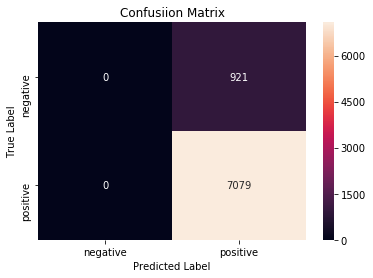

In [46]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_avgw2v, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


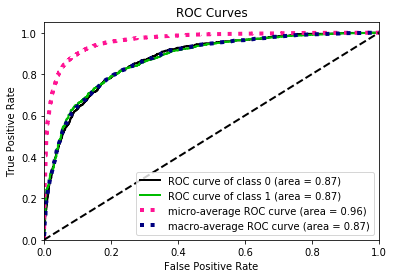

In [47]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,predict_test_CalibCV_avgw2v)

## Applying rbf SVM on AvgW2V

## tuning C for rbf on avgW2V

In [80]:
cs = [0.1, 1, 10]
for c in cs:
    rbf_svc_avgw2v= svm.SVC(kernel='rbf', C=c)
    rbf_svc_avgw2v.fit(train_avgw2v, y_train)
    pred_cv_avgw2v = rbf_svc_avgw2v.predict(cv_avgw2v)
        
    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred_cv_avgw2v, normalize=True) * float(100)
    print('\nCV accuracy for C  = %d is %d%%' % (c,acc))

joblib.dump(rbf_svc_avgw2v,"rbf_svc_avgw2v.pkl")
joblib.dump(pred_cv_avgw2v,"pred_cv_avgw2v.pkl")


CV accuracy for C  = 0 is 90%

CV accuracy for C  = 1 is 91%

CV accuracy for C  = 10 is 91%


['pred_cv_avgw2v.pkl']

## tuning gamma for rbf on avgW2V

In [82]:
gammas = [0.1, 1, 10]
for gm in gammas:
    rbf_svc_gm_avgw2v = svm.SVC(kernel='rbf', gamma=gm)
    rbf_svc_gm_avgw2v.fit(train_avgw2v, y_train)
    pred_cv_gm_avgw2v = rbf_svc_gm_avgw2v.predict(cv_avgw2v)
        
    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred_cv_gm_avgw2v, normalize=True) * float(100)
    print('\nCV accuracy for gamma  = %d  is %d%%' % (gm,acc))

joblib.dump(rbf_svc_gm_avgw2v,"rbf_svc_gm_avgw2v.pkl")
joblib.dump(pred_cv_gm_avgw2v,"pred_cv_gm_avgw2v.pkl")


CV accuracy for gamma  = 0  is 91%

CV accuracy for gamma  = 1  is 89%

CV accuracy for gamma  = 10  is 89%


['pred_cv_gm_avgw2v.pkl']

## SVC with RBF kernel with best parameters

In [83]:
# SVC with RBF kernel
rbf_svc_best_avgw2v = svm.SVC(kernel='rbf', C=10, gamma=0.1,class_weight='balanced')
rbf_svc_best_avgw2v.fit(train_avgw2v, y_train)

joblib.dump(rbf_svc_best_avgw2v,"rbf_svc_best_avgw2v.pkl")

['rbf_svc_best_avgw2v.pkl']

In [88]:
rbf_svc_best_avgw2v = joblib.load("rbf_svc_best_avgw2v.pkl")

#rbf_svc_best_fit = rbf_svc_best.fit(train_bow, y_train)
#joblib.dump(rbf_svc_best_fit,"rbf_svc_best_fit.pkl")

In [89]:
#Predicting over Test data points
pred_test_rbf_avgw2v = rbf_svc_best_avgw2v.predict(test_avgw2v)
print(pred_test_rbf_avgw2v)

[1 1 1 ... 1 1 1]


In [86]:
model_rbf_CalibCV_avgw2v = CalibratedClassifierCV(rbf_svc_best_avgw2v)
model_rbf_CalibCV_avgw2v.fit(train_avgw2v, y_train)

joblib.dump(model_rbf_CalibCV_avgw2v,"model_rbf_CalibCV_avgw2v.pkl")

['model_rbf_CalibCV_avgw2v.pkl']

In [87]:
model_rbf_CalibCV_avgw2v = joblib.load("model_rbf_CalibCV_avgw2v.pkl")

# Predict target vector
predict_test_rbf_CalibCV_avgw2v = model_rbf_CalibCV_avgw2v.predict_proba(test_avgw2v)

In [88]:
predict_test_rbf_CalibCV_avgw2v

array([[0.1624742 , 0.8375258 ],
       [0.40494018, 0.59505982],
       [0.05401368, 0.94598632],
       ...,
       [0.04607432, 0.95392568],
       [0.04758219, 0.95241781],
       [0.09371685, 0.90628315]])

In [ ]:
#defining own threshhold for prediction over probability values
def pred(y):
    y_pred = []
    i=[]
    for i in y:
        if i.any()>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

pred_test_rbf_avgw2v = pred(predict_test_rbf_CalibCV_avgw2v)

In [90]:
print("Score= ",rbf_svc_best_avgw2v.score(test_avgw2v, pred_test_rbf_avgw2v))
auc_score_rbf_avgw2v = roc_auc_score(y_test, pred_test_rbf_avgw2v)
print("AUC Score= ",auc_score_rbf_avgw2v)

Score=  1.0
AUC Score=  0.5


In [96]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_avgw2v_rbf = confusion_matrix(y_test, pred_test_rbf_avgw2v)
cm_avgw2v_rbf

array([[ 231,  690],
       [ 132, 6947]], dtype=int64)

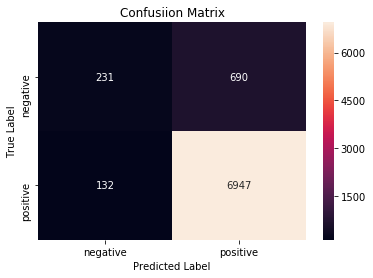

In [97]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_avgw2v_rbf, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


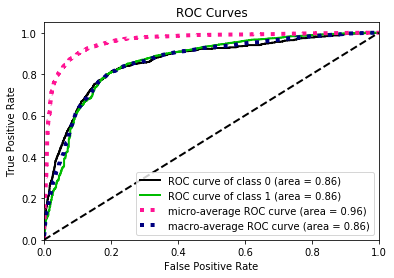

In [98]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,predict_test_rbf_CalibCV_avgw2v)

## tfidf-W-W2V

In [6]:
fileObject = open("./final_to_file2.pkl",'rb') # we open the file for reading 
final = pickle.load(fileObject) # load the object from the file

In [7]:
#w2v
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())
    
print(type(list_of_sent))
print(final['CleanedText'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

<class 'list'>
witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [8]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [9]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(final['CleanedText'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [10]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in (list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [11]:
print(len(tfidf_sent_vectors))
print(np.shape(tfidf_sent_vectors))
print(type(tfidf_sent_vectors))

60000
(60000, 50)
<class 'list'>


In [13]:
# create design matrix X and target vector y
X = np.array(tfidf_sent_vectors[::]) # end index is exclusive
y = np.array(final['Score']) # showing you two ways of indexing a pandas df

In [14]:
#taking 40K data into consideration
X_train_nstd = X[0:25000:1]
X_cv_nstd = X[25000:32000:1]
X_test_nstd = X[32000:40000:1]

y_train_nstd = y[0:25000:1]
y_cv_nstd = y[25000:32000:1]
y_test_nstd = y[32000:40000:1]

print(X_train_nstd.shape)
print(X_cv_nstd.shape)
print(X_test_nstd.shape)
print(y_train_nstd.shape)
print(y_cv_nstd.shape)
print(y_test_nstd.shape)

(25000, 50)
(7000, 50)
(8000, 50)
(25000,)
(7000,)
(8000,)


In [15]:
# Column Standardization of the tfidf non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(X_train_nstd)
train_tfidfww2v = std_scal.transform(X_train_nstd)
cv_tfidfww2v = std_scal.transform(X_cv_nstd)
test_tfidfww2v = std_scal.transform(X_test_nstd)

## Applying Linear SVM on tfidf-W-W2V

In [108]:
lin_svc_l1_tfidfww2v = linear_model.SGDClassifier(penalty='l1')
lin_svc_l1_tfidfww2v.fit(train_tfidfww2v, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [109]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]} #params we need to try on classifier
gsv_l1_tfidfww2v = GridSearchCV(lin_svc_l1_tfidfww2v,param_grid,cv=5,verbose=1)
gsv_l1_tfidfww2v.fit(train_tfidfww2v,y_train)

print("Best HyperParameter: ",gsv_l1_tfidfww2v.best_params_)
print("Best Accuracy: %.2f%%"%(gsv_l1_tfidfww2v.best_score_*100))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    8.8s finished


Best HyperParameter:  {'alpha': 0.001}
Best Accuracy: 90.19%


In [110]:
    print("Scores for alphas:")
    print(gsv_l1_tfidfww2v.grid_scores_)
    print("\nBest estimator:")
    print(gsv_l1_tfidfww2v.best_estimator_)
    print("Best score:")
    print(gsv_l1_tfidfww2v.best_score_)
    print("\nBest parameters:")
    print(gsv_l1_tfidfww2v.best_params_)

Scores for alphas:
[mean: 0.90188, std: 0.00132, params: {'alpha': 0.001}, mean: 0.88980, std: 0.00000, params: {'alpha': 0.01}, mean: 0.88980, std: 0.00000, params: {'alpha': 0.1}, mean: 0.88980, std: 0.00000, params: {'alpha': 1}, mean: 0.88980, std: 0.00000, params: {'alpha': 10}, mean: 0.88980, std: 0.00000, params: {'alpha': 100}, mean: 0.88980, std: 0.00000, params: {'alpha': 1000}]

Best estimator:
SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
Best score:
0.90188

Best parameters:
{'alpha': 0.001}


C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [111]:
lin_svc_l2_tfidfww2v = linear_model.SGDClassifier(penalty='l2')
lin_svc_l2_tfidfww2v.fit(train_tfidfww2v, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [112]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]} #params we need to try on classifier
gsv_l2_tfidfww2v = GridSearchCV(lin_svc_l2_tfidfww2v,param_grid,cv=5,verbose=1)
gsv_l2_tfidfww2v.fit(train_tfidfww2v,y_train)

print("Best HyperParameter: ",gsv_l2_tfidfww2v.best_params_)
print("\nBest Accuracy: %.2f%%"%(gsv_l2_tfidfww2v.best_score_*100))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best HyperParameter:  {'alpha': 0.01}

Best Accuracy: 90.25%


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    4.8s finished


In [113]:
    print("Scores for alphas:")
    print(gsv_l2_tfidfww2v.grid_scores_)
    print("\nBest estimator:")
    print(gsv_l2_tfidfww2v.best_estimator_)
    print("\nBest score:")
    print(gsv_l2_tfidfww2v.best_score_)
    print("\nBest parameters:")
    print(gsv_l2_tfidfww2v.best_params_)

Scores for alphas:
[mean: 0.89856, std: 0.00424, params: {'alpha': 0.001}, mean: 0.90252, std: 0.00338, params: {'alpha': 0.01}, mean: 0.88980, std: 0.00000, params: {'alpha': 0.1}, mean: 0.88980, std: 0.00000, params: {'alpha': 1}, mean: 0.88980, std: 0.00000, params: {'alpha': 10}, mean: 0.79896, std: 0.18168, params: {'alpha': 100}, mean: 0.73388, std: 0.31184, params: {'alpha': 1000}]

Best estimator:
SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

Best score:
0.90252

Best parameters:
{'alpha': 0.01}


C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [114]:
# SVC with Linear kernel 
#with best alpha and penalty
lin_svc_tfidfww2v = linear_model.SGDClassifier(alpha=0.01,penalty='l2',loss='hinge')
lin_svc_tfidfww2v.fit(train_tfidfww2v, y_train)

joblib.dump(lin_svc_tfidfww2v,"lin_svc_tfidfww2v.pkl")

['lin_svc_tfidfww2v.pkl']

In [115]:
lin_svc_tfidfww2v = joblib.load("lin_svc_tfidfww2v.pkl")

# Fit linear kernel model
best_model_tfidfww2v = lin_svc_tfidfww2v.fit(train_tfidfww2v, y_train)
joblib.dump(best_model_tfidfww2v,"best_model_tfidfww2v.pkl")
best_model_tfidfww2v

SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [63]:
best_model_tfidfww2v = joblib.load("best_model_tfidfww2v.pkl")

# Predict target vector
predict_test_tfidfww2v = best_model_tfidfww2v.predict(test_tfidfww2v)
#best_model.cv_results_ 

In [64]:
print("Score= ",best_model_tfidfww2v.score(test_tfidfww2v, predict_test_tfidfww2v))
auc_score_lin_tfidfww2v = roc_auc_score(y_test, predict_test_tfidfww2v)
print("AUC Score= ",auc_score_lin_tfidfww2v)

Score=  1.0
AUC Score=  0.49924935875697246


In [119]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_tfidfww2v = confusion_matrix(y_test, predict_test_tfidfww2v)
cm_tfidfww2v

array([[ 142,  779],
       [  34, 7045]], dtype=int64)

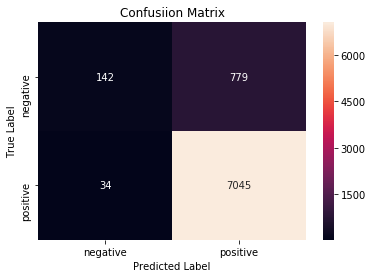

In [120]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_tfidfww2v, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [121]:
model_tfidfww2v = CalibratedClassifierCV(lin_svc_tfidfww2v)
model_tfidfww2v.fit(train_tfidfww2v, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
            cv=3, method='sigmoid')

In [122]:
# Predict target vector
predict_test_CalibCV_tfidfww2v = model_tfidfww2v.predict_proba(test_tfidfww2v)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


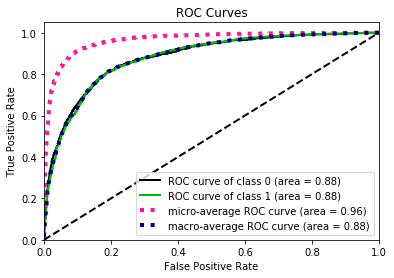

In [123]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,predict_test_CalibCV_tfidfww2v)

## Applying rbf on tfidf-W-W2V

## tuning C for rbf on avgW2V

In [124]:
cs = [0.1, 1, 10]
for c in cs:
    rbf_svc_tfidfww2v= svm.SVC(kernel='rbf', C=c)
    rbf_svc_tfidfww2v.fit(train_avgw2v, y_train)
    pred_cv_tfidfww2v = rbf_svc_tfidfww2v.predict(cv_tfidfww2v)
        
    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred_cv_tfidfww2v, normalize=True) * float(100)
    print('\nCV accuracy for C  = %d is %d%%' % (c,acc))

joblib.dump(rbf_svc_tfidfww2v,"rbf_svc_tfidfww2v.pkl")
joblib.dump(pred_cv_tfidfww2v,"pred_cv_tfidfww2v.pkl")


CV accuracy for C  = 0 is 90%

CV accuracy for C  = 1 is 91%

CV accuracy for C  = 10 is 91%


['pred_cv_tfidfww2v.pkl']

## tuning gamma for rbf on avgW2V

In [126]:
gammas = [0.1, 1, 10]
for gm in gammas:
    rbf_svc_gm_tfidfww2v = svm.SVC(kernel='rbf', gamma=gm)
    rbf_svc_gm_tfidfww2v.fit(train_tfidfww2v, y_train)
    pred_cv_gm_tfidfww2v = rbf_svc_gm_tfidfww2v.predict(cv_tfidfww2v)
        
    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred_cv_gm_tfidfww2v, normalize=True) * float(100)
    print('\nCV accuracy for gamma  = %d  is %d%%' % (gm,acc))

joblib.dump(rbf_svc_gm_avgw2v,"rbf_svc_gm_tfidfww2v.pkl")
joblib.dump(pred_cv_gm_avgw2v,"pred_cv_gm_tfidfww2v.pkl")


CV accuracy for gamma  = 0  is 91%

CV accuracy for gamma  = 1  is 89%

CV accuracy for gamma  = 10  is 89%


['pred_cv_gm_tfidfww2v.pkl']

## SVC with RBF kernel with best parameters

In [16]:
# SVC with RBF kernel
rbf_svc_best_tfidfww2v = svm.SVC(kernel='rbf', C=10, gamma=0.1,class_weight='balanced')
rbf_svc_best_tfidfww2v.fit(train_tfidfww2v, y_train)

joblib.dump(rbf_svc_best_tfidfww2v,"rbf_svc_best_tfidfww2v.pkl")

['rbf_svc_best_tfidfww2v.pkl']

In [17]:
rbf_svc_best_tfidfww2v = joblib.load("rbf_svc_best_tfidfww2v.pkl")

#rbf_svc_best_fit = rbf_svc_best.fit(train_bow, y_train)
#joblib.dump(rbf_svc_best_fit,"rbf_svc_best_fit.pkl")

In [18]:
#Predicting over Test data points
pred_test_rbf_tfidfww2v = rbf_svc_best_tfidfww2v.predict(test_tfidfww2v)
print(pred_test_rbf_tfidfww2v)

[1 1 1 ... 1 1 1]


In [19]:
model_rbf_CalibCV_tfidfww2v = CalibratedClassifierCV(rbf_svc_best_tfidfww2v)
model_rbf_CalibCV_tfidfww2v.fit(train_tfidfww2v, y_train)

joblib.dump(model_rbf_CalibCV_tfidfww2v,"model_rbf_CalibCV_tfidfww2v.pkl")

['model_rbf_CalibCV_tfidfww2v.pkl']

In [20]:
model_rbf_CalibCV_tfidfww2v = joblib.load("model_rbf_CalibCV_tfidfww2v.pkl")

# Predict target vector
predict_test_rbf_CalibCV_tfidfww2v = model_rbf_CalibCV_tfidfww2v.predict_proba(test_tfidfww2v)

In [21]:
predict_test_rbf_CalibCV_tfidfww2v

array([[0.24921219, 0.75078781],
       [0.32430499, 0.67569501],
       [0.06570459, 0.93429541],
       ...,
       [0.01825257, 0.98174743],
       [0.04319045, 0.95680955],
       [0.06765002, 0.93234998]])

In [ ]:
#defining own threshhold for prediction over probability values
def pred(y):
    y_pred = []
    i=[]
    for i in y:
        if i.any()>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

pred_test_rbf_tfidfww2v = pred(predict_test_rbf_CalibCV_tfidfww2v)

In [23]:
print("Score= ",rbf_svc_best_tfidfww2v.score(test_tfidfww2v, pred_test_rbf_tfidfww2v))
auc_score_rbf_tfidfww2v = roc_auc_score(y_test, pred_test_rbf_tfidfww2v)
print("AUC Score= ",auc_score_rbf_tfidfww2v)

Score=  1.0
AUC Score=  0.6125661239932335


In [24]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_tfidfww2v_rbf = confusion_matrix(y_test, pred_test_rbf_tfidfww2v)
cm_tfidfww2v_rbf

array([[ 224,  697],
       [ 128, 6951]], dtype=int64)

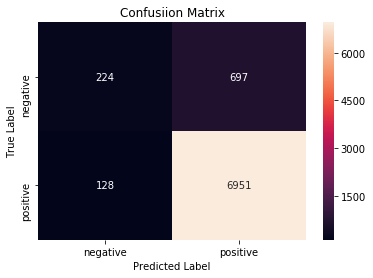

In [25]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_tfidfww2v_rbf, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


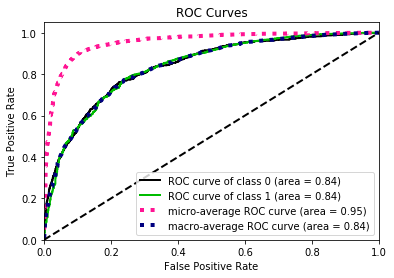

In [26]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,predict_test_rbf_CalibCV_tfidfww2v)

In [91]:
x = PrettyTable()
x.field_names = ["Paramters/Models","BoW", "TFIDF", "AvgW2V", "TFIDF-W-W2V"]
#x.field_names = ["Kernel = Linear"]

x.add_row(["(Kernel = Linear) Best Parameters: alpha: ", "0.1", "1", "0.001", "0.01"])
x.add_row(["(Kernel = Linear) Best Penalty: ", "l2", "l2","l1","l2"])
x.add_row(["(Kernel = Linear) AUC Score: ",auc_score_lin_bow, auc_score_lin_tfidf, auc_score_lin_avgw2v, auc_score_lin_tfidfww2v])

#x.field_names = ["Kernel = RBF"]

x.add_row(["(Kernel = RBF) Best Parameters: C: ", "10", "10", "10", "10"])
x.add_row(["(Kernel = RBF) Best Parameters: Gamma: ", "1", "1","0.1","0.1"])
x.add_row(["(Kernel = RBF) AUC Score: ",auc_score_rbf_bow, auc_score_rbf_tfidf, auc_score_rbf_avgw2v, auc_score_rbf_tfidfww2v])

print(x)

+--------------------------------------------+--------------------+--------------------+--------+---------------------+
|              Paramters/Models              |        BoW         |       TFIDF        | AvgW2V |     TFIDF-W-W2V     |
+--------------------------------------------+--------------------+--------------------+--------+---------------------+
| (Kernel = Linear) Best Parameters: alpha:  |        0.1         |         1          | 0.001  |         0.01        |
|      (Kernel = Linear) Best Penalty:       |         l2         |         l2         |   l1   |          l2         |
|       (Kernel = Linear) AUC Score:         | 0.7107706741920982 | 0.6141421791817765 |  0.5   | 0.49924935875697246 |
|    (Kernel = RBF) Best Parameters: C:      |         10         |         10         |   10   |          10         |
|  (Kernel = RBF) Best Parameters: Gamma:    |         1          |         1          |  0.1   |         0.1         |
|         (Kernel = RBF) AUC Score:     